In [1]:
from nnlearn.Compress import *
from nnlearn.Network import sigmoid
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
from multiprocessing import Process
from threading import Thread
import os
import imageio


 shape: (109, 109) 
pixels: 11881


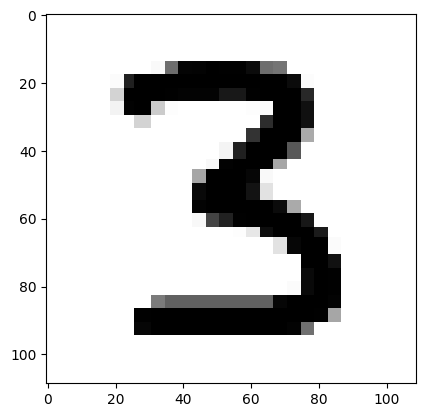

In [2]:
img = image.imread("images/digit_3.png")[:,:,0]

scale_down_factor = 4

temp_x = np.arange(452) % scale_down_factor == 0
temp_y = np.arange(451) % scale_down_factor == 0
img = img[temp_x, :]
img = img[:,temp_y]

img = img[2:-2,2:-2]

img = sigmoid((img - np.mean(img))/np.std(img)*3)
# print(img)

print("\n shape:", img.shape, "\npixels:", np.product(img.shape))
plt.imshow(img, cmap = 'Greys')
plt.show()

In [3]:
compresser_sigmoid = nn_image_compresser(hidden_layers = 2, layer_width = 20, activation = sigmoid_activation_layer)

compresser_leaky_relu = nn_image_compresser(hidden_layers = 2, layer_width = 20, activation = leaky_relu_activation_layer)


In [54]:
eps = 5000

for i in range(170):

    compresser_leaky_relu.fit(img, batch_size = 16, epochs = i**2, verbose = False, learn_coef = .05)

    compresser_sigmoid.fit(img, batch_size = 16, epochs = i**2, verbose = False, learn_coef = .05)


    recreated_image_leaky_relu = compresser_leaky_relu.create_image(100,100)
    recreated_image_sigmoid = compresser_sigmoid.create_image(100,100)

    plt.imsave(f"images/leaky_relu_recreations/leaky_relu_{i}.png", recreated_image_leaky_relu)
    plt.imsave(f"images/sigmoid_recreations/sigmoid_{i}.png", recreated_image_sigmoid)

    





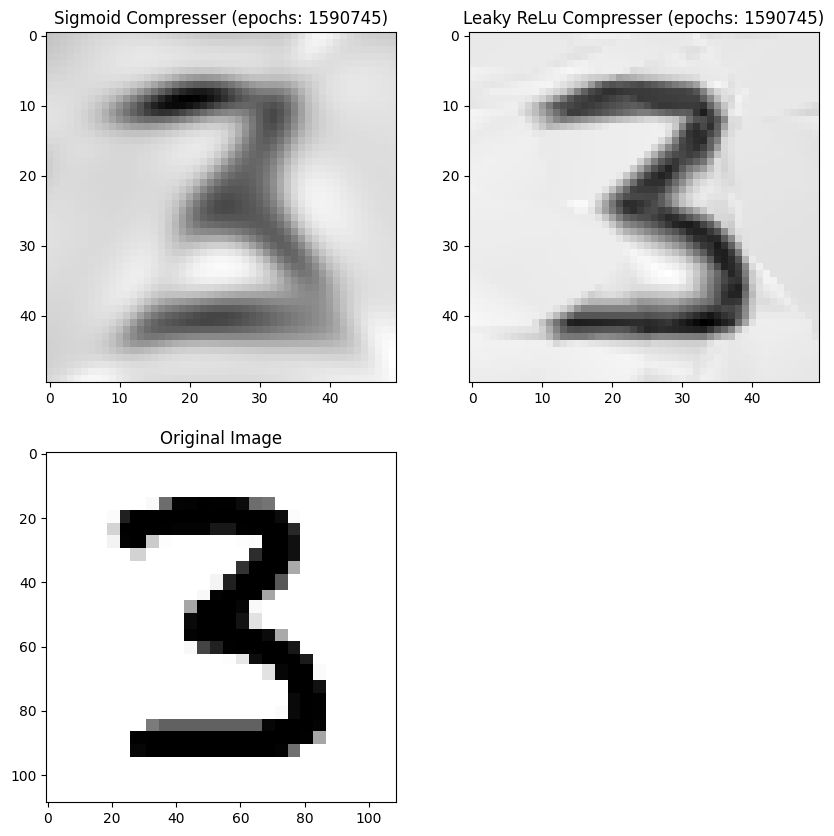

In [55]:
#SIGMOID COMPRESSER RECREATION
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
recreated_image_sigmoid = compresser_sigmoid.create_image(50,50)
plt.imshow(recreated_image_sigmoid, cmap = 'Greys')
plt.title(f"Sigmoid Compresser (epochs: {compresser_sigmoid.network.epochs_trained})")


#LEAKY RELU COMPRESSER RECREATION
plt.subplot(2,2,2)
recreated_image_leaky_relu = compresser_leaky_relu.create_image(50,50)
plt.imshow(recreated_image_leaky_relu, cmap = 'Greys')
plt.title(f"Leaky ReLu Compresser (epochs: {compresser_leaky_relu.network.epochs_trained})")


# #DEEP LEAKY RELU COMPRESSER RECREATION
# plt.subplot(2,2,3)
# recreated_image_leaky_relu_large = compresser_leaky_relu_large.create_image(50,50)
# plt.imshow(recreated_image_leaky_relu_large, cmap = 'Greys')
# plt.title(f"Large Leaky ReLu Compresser (epochs: {compresser_leaky_relu_large.network.epochs_trained})")


#ORIGINAL
plt.subplot(2,2,3)
plt.imshow(img, cmap = 'Greys')
plt.title('Original Image')


plt.show()


In [56]:
# plt.imsave("images/leaky_relu_digit_3.png", recreated_image_leaky_relu)
# plt.imsave("images/sigmoid_digit_3.png", recreated_image_sigmoid)

In [57]:
def gif_from_folder(folder_path, gif_name):

    file_name_list = np.array(sorted(os.listdir(folder_path))[1:])
    nums = list(map(lambda x: x.split("_")[-1], file_name_list))
    nums = list(map(lambda x: int(x.split(".")[0]), nums))

    file_name_list = file_name_list[np.argsort(nums)]
    


    images = []

    for file_name in file_name_list:
        if file_name.endswith('.png'):
            file_path = os.path.join(folder_path, file_name)
            for i in range(30):
                images.append(imageio.imread(file_path))
        

    for _ in range(200):
        images.append(imageio.imread(file_path))


    imageio.mimsave(gif_name, images)

In [58]:
gif_from_folder('images/leaky_relu_recreations', 'images/leaky_relu_recreation.gif')
gif_from_folder('images/sigmoid_recreations', 'images/sigmoid_recreation.gif')

/var/folders/tx/h47wpqps5ydgfr3k60t8fjx00000gn/T/ipykernel_31862/195048571.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/var/folders/tx/h47wpqps5ydgfr3k60t8fjx00000gn/T/ipykernel_31862/195048571.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
